# Clase 5
## Laboratorio 3.2: Exploración de datos

In [ ]:
# Importar librerías
import warnings, requests, zipfile, io
warnings.simplefilter('ignore')
import pandas as pd
from scipy.io import arff

In [ ]:
# Descarga el archivo zip
f_zip = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00212/vertebral_column_data.zip'
r = requests.get(f_zip, stream=True)
Vertebral_zip = zipfile.ZipFile(io.BytesIO(r.content))

#Extracción del contenido
Vertebral_zip.extractall()

In [ ]:
# Lectura del archivo arff
data = arff.loadarff('column_2C_weka.arff')

# Creación del DataFrame con Pandas
df = pd.DataFrame(data[0])
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'


In [ ]:
# Visualizar las dimensiones del dataframe
df.shape

(310, 7)

In [ ]:
# Identificación de columnas
df.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

In [ ]:
# Visualizar los tipos de datos de cada columna
df.dtypes

,0
pelvic_incidence,float64
pelvic_tilt,float64
lumbar_lordosis_angle,float64
sacral_slope,float64
pelvic_radius,float64
degree_spondylolisthesis,float64
class,object


In [ ]:
# Estadísticas básicas de todo el dataframe
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


<Axes: >

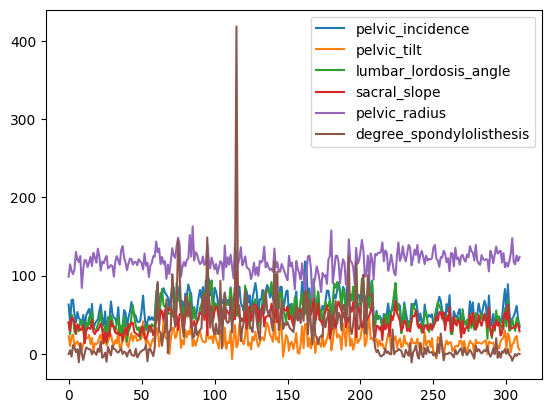

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot()

<Axes: ylabel='Frequency'>

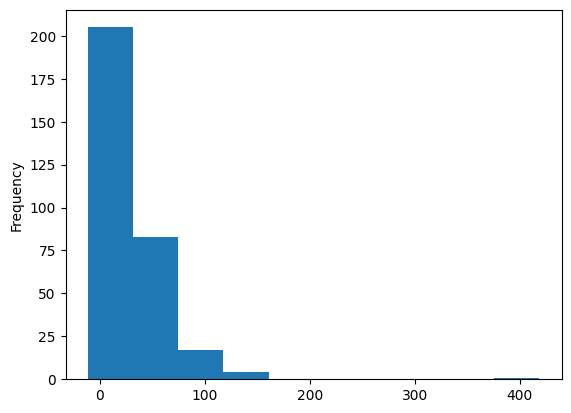

In [ ]:
df['degree_spondylolisthesis'].plot.hist()

<Axes: >

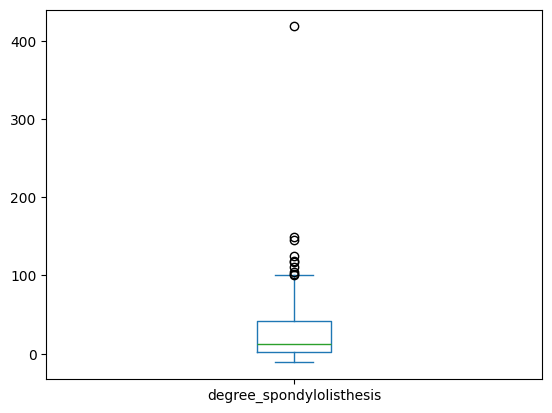

In [ ]:
df['degree_spondylolisthesis'].plot.box()

In [ ]:
# Realiza el conteo de cada valor único
df['class'].value_counts()

,count
class,
b'Abnormal',210
b'Normal',100


## Introducción a Plotly

Plotly es una librería de visualización interactiva que permite crear gráficos dinámicos, zoom, hover y dashboards con muy poco código.
Funciona perfecto en Google Colab.

In [ ]:
!pip install plotly

In [ ]:
# Importar librerías
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd


### Gráficos básicos con plotly.express
#### Gráfico de dispersión (scatter)

In [ ]:
df = px.data.iris()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [ ]:
fig = px.scatter(df, x='sepal_length', y='sepal_width', color='species')
fig.show()

#### Gráfico de líneas

In [ ]:
df = px.data.gapminder().query("country == 'Guatemala'")
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
600,Guatemala,Americas,1952,42.023,3146381,2428.237769,GTM,320
601,Guatemala,Americas,1957,44.142,3640876,2617.155967,GTM,320
602,Guatemala,Americas,1962,46.954,4208858,2750.364446,GTM,320
603,Guatemala,Americas,1967,50.016,4690773,3242.531147,GTM,320
604,Guatemala,Americas,1972,53.738,5149581,4031.408271,GTM,320


In [ ]:
df.shape

(12, 8)

In [ ]:
fig = px.line(df, x='year', y='lifeExp', title='Esperanza de vida en Guatemala a lo largo del tiempo')
fig.show()

#### Gráfico de barras

In [ ]:
df = px.data.tips()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
fig = px.bar(df, x='day', y='total_bill', color='sex', title='Gastos por día')
fig.show()

#### Boxplot

In [ ]:
fig = px.box(df, x='day', y='total_bill', color='day')
fig.show()

#### Histogramas

In [ ]:
fig = px.histogram(df, x='total_bill', nbins=15, color='sex')
fig.show()

### Gráficos avanzados con graph_objects
graph_objects otorga un control total sobre cada parte del gráfico.

#### Gráfico de líneas avanzado


In [ ]:
from numpy._core.defchararray import title
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df['total_bill'], y=df['tip'],
        mode="markers+lines",
        name='Relación entre total bill y tip'
    )
)

fig.update_layout(title='Ejemplo')
fig.show()


#### Subplots (múltiples gráficos en un solo lienzo)

In [ ]:
from plotly.subplots import make_subplots

In [ ]:
fig = make_subplots(rows=2, cols=2)

fig.add_trace(go.Scatter(x=df['total_bill'], y=df['tip'], mode="markers+lines", name='Relación entre total bill y tip'), row=1, col=1)
fig.add_trace(go.Box(y=df['total_bill']), row=1, col=2)
fig.add_trace(go.Histogram(x=df['tip']), row=2, col=1)
fig.add_trace(go.Bar(x=df['day'].unique(), y=df.groupby('day')['total_bill'].mean()), row=2, col=2)

fig.update_layout(title="Ejemplo subplots")
fig.show()

# Laboratorio 3.3: Codificación de variables categóricas

In [1]:
# Importar la librería de pandas
import pandas as pd

# Configurar opciones de visualización de pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
url = "imports-85.csv"
col_names=['symboling','normalized-losses','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base',
                                    'length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size',
                                    'fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

df_car = pd.read_csv(url,sep=',',names = col_names ,na_values="?",  header=None)

In [ ]:
# Mostrar las dimensiones del dataframe
df_car.shape

(205, 25)

In [ ]:
# Mostrar los primeros 5 registros
df_car.head(5)

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
# Visualización de la información general del dataset
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   fuel-type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num-of-doors       203 non-null    object 
 5   body-style         205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   engine-location    205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    object 
 14  num-of-cylinders   205 non-null    object 
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non

In [ ]:
# Ver todas las columnas del dataframe
df_car.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'], dtype='object')

In [3]:
# Crear una copia del dataframe utilizando solamente las columnas de interés
df_car = df_car[[ 'aspiration', 'num-of-doors',  'drive-wheels',  'num-of-cylinders']].copy()

In [4]:
# Ver las primeras 5 filas
df_car.head()

,aspiration,num-of-doors,drive-wheels,num-of-cylinders
0,std,two,rwd,four
1,std,two,rwd,four
2,std,two,rwd,six
3,std,four,fwd,four
4,std,four,4wd,five


In [ ]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   aspiration        205 non-null    object
 1   num-of-doors      203 non-null    object
 2   drive-wheels      205 non-null    object
 3   num-of-cylinders  205 non-null    object
dtypes: object(4)
memory usage: 6.5+ KB


## Codificación de variables ordinales

In [ ]:
# Conteo de las variables unicas
df_car['num-of-doors'].value_counts()

,count
num-of-doors,
four,114
two,89


In [ ]:
# Crear el mapeo de las variables
door_mapper = {"two": 2,
              "four": 4}

In [ ]:
# Realizar el reemplazo de valores
df_car['doors'] = df_car["num-of-doors"].replace(door_mapper)

In [ ]:
df_car.head()

,aspiration,num-of-doors,drive-wheels,num-of-cylinders,doors
0,std,two,rwd,four,2.0
1,std,two,rwd,four,2.0
2,std,two,rwd,six,2.0
3,std,four,fwd,four,4.0
4,std,four,4wd,five,4.0


In [ ]:
# Realizar el conteo de valores únicos
df_car['num-of-cylinders'].value_counts()

,count
num-of-cylinders,
four,159
six,24
five,11
eight,5
two,4
three,1
twelve,1


Codificación de categorias no ordinales

In [ ]:
# Configurar el mapeo de las variables
cylinder_mapper = {"two":2,
                  "three":3,
                  "four":4,
                  "five":5,
                  "six":6,
                  "eight":8,
                  "twelve":12}

In [ ]:
# Realizar la codificación de las variables
df_car['cylinders'] = df_car['num-of-cylinders'].replace(cylinder_mapper)

In [ ]:
df_car.head()

,aspiration,num-of-doors,drive-wheels,num-of-cylinders,doors,cylinders
0,std,two,rwd,four,2.0,4
1,std,two,rwd,four,2.0,4
2,std,two,rwd,six,2.0,6
3,std,four,fwd,four,4.0,4
4,std,four,4wd,five,4.0,5


### Codificación de variables no ordinales

In [ ]:
# Contar los valores únicos
df_car['drive-wheels'].value_counts()

,count
drive-wheels,
fwd,120
rwd,76
4wd,9


In [ ]:
df_car = pd.get_dummies(df_car,columns=['drive-wheels'])

In [ ]:
df_car.head()

,aspiration,num-of-doors,num-of-cylinders,doors,cylinders,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,std,two,four,2.0,4,False,False,True
1,std,two,four,2.0,4,False,False,True
2,std,two,six,2.0,6,False,False,True
3,std,four,four,4.0,4,False,True,False
4,std,four,five,4.0,5,True,False,False


In [ ]:
df_car['aspiration'].value_counts()

,count
aspiration,
std,168
turbo,37


In [ ]:
df_car = pd.get_dummies(df_car,columns=['aspiration'], drop_first=True)

In [ ]:
df_car.head()

,num-of-doors,num-of-cylinders,doors,cylinders,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,aspiration_turbo
0,two,four,2.0,4,False,False,True,False
1,two,four,2.0,4,False,False,True,False
2,two,six,2.0,6,False,False,True,False
3,four,four,4.0,4,False,True,False,False
4,four,five,4.0,5,True,False,False,False


In [5]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   aspiration        205 non-null    object
 1   num-of-doors      203 non-null    object
 2   drive-wheels      205 non-null    object
 3   num-of-cylinders  205 non-null    object
dtypes: object(4)
memory usage: 6.5+ KB


In [6]:
df_car.dropna(inplace=True)

In [7]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 204
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   aspiration        203 non-null    object
 1   num-of-doors      203 non-null    object
 2   drive-wheels      203 non-null    object
 3   num-of-cylinders  203 non-null    object
dtypes: object(4)
memory usage: 7.9+ KB


## Utilizando Scikit-Learn

**¿Qué es scikit-learn?**

Scikit-learn (sklearn) es una de las bibliotecas más utilizadas en Python para machine learning.
Proporciona herramientas simples y eficientes para:

* Clasificación

* Regresión

* Clustering

* Reducción de dimensionalidad

* Preprocesamiento de datos

* Selección de modelos y validación cruzada

**FunctionTransformer** es una clase de scikit-learn que permite aplicar cualquier función personalizada como un paso dentro de un pipeline de preprocesamiento.

Sirve para:

* Transformar columnas de manera personalizada

* Aplicar funciones de NumPy o definidas por el usuario

* Automatizar transformaciones dentro de un pipeline para entrenamiento y predicción

In [8]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

door_mapper = {"two": 2, "four": 4}

def map_doors(x):
  return np.vectorize(door_mapper.get)(x)

door_transformer = FunctionTransformer(map_doors, validate=False)

# Aplicar transformación
df_car['doors'] = door_transformer.fit_transform(df_car['num-of-doors'])

In [9]:
df_car.head()

,aspiration,num-of-doors,drive-wheels,num-of-cylinders,doors
0,std,two,rwd,four,2
1,std,two,rwd,four,2
2,std,two,rwd,six,2
3,std,four,fwd,four,4
4,std,four,4wd,five,4


In [10]:
cylinder_mapper = {
    "two": 2, "three": 3, "four": 4, "five": 5,
    "six": 6, "eight": 8, "twelve": 12
}

def map_cylinders(x):
  return np.vectorize(cylinder_mapper.get)(x)

cylinder_transformer = FunctionTransformer(map_cylinders, validate=False)

# Aplicar transformación
df_car['cylinders'] = cylinder_transformer.fit_transform(df_car['num-of-cylinders'])


In [11]:
df_car.head()

,aspiration,num-of-doors,drive-wheels,num-of-cylinders,doors,cylinders
0,std,two,rwd,four,2,4
1,std,two,rwd,four,2,4
2,std,two,rwd,six,2,6
3,std,four,fwd,four,4,4
4,std,four,4wd,five,4,5


# Codificación de variables no ordinales
**OneHotEncoder** es un codificador de scikit-learn que transforma variables categóricas en vectores binarios (0/1).
Cada categoría se convierte en una columna adicional.

Usos:

* Preparar datos categóricos para modelos que requieren valores numéricos

* Evitar relaciones artificiales entre categorías (mejor que LabelEncoder en variables nominales)

In [14]:
from sklearn.preprocessing import OneHotEncoder

# Crear el OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Ajustar y transformar
drive_encoded = encoder.fit_transform(df_car[['drive-wheels']])

# Obtener los nombres de las nuevas columnas
column_names = encoder.get_feature_names_out(['drive-wheels'])

# Convertir a DataFrame
df_drive = pd.DataFrame(drive_encoded, columns=column_names)

# Concatenar con el DataFrame original (eliminando la columna original)
df_car_encoded = pd.concat(
    [df_car.drop(columns=['drive-wheels']), df_drive],
    axis=1
)

df_car_encoded.head()

,aspiration,num-of-doors,num-of-cylinders,doors,cylinders,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,std,two,four,2.0,4.0,0.0,0.0,1.0
1,std,two,four,2.0,4.0,0.0,0.0,1.0
2,std,two,six,2.0,6.0,0.0,0.0,1.0
3,std,four,four,4.0,4.0,0.0,1.0,0.0
4,std,four,five,4.0,5.0,1.0,0.0,0.0


In [15]:
# Crear un OneHotEncoder que elimine la primera categoría
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Ajustar y transformar
aspiration_encoded = encoder.fit_transform(df_car[['aspiration']])

# Obtener los nombres de las nuevas columnas
column_names = encoder.get_feature_names_out(['aspiration'])

# Convertir a DataFrame
df_aspiration = pd.DataFrame(aspiration_encoded, columns=column_names)

# Concatenar con el DataFrame original (eliminando la columna original)
df_car_encoded2 = pd.concat(
    [df_car_encoded.drop(columns=['aspiration']), df_aspiration],
    axis=1
)

df_car_encoded2.head()



,num-of-doors,num-of-cylinders,doors,cylinders,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,aspiration_turbo
0,two,four,2.0,4.0,0.0,0.0,1.0,0.0
1,two,four,2.0,4.0,0.0,0.0,1.0,0.0
2,two,six,2.0,6.0,0.0,0.0,1.0,0.0
3,four,four,4.0,4.0,0.0,1.0,0.0,0.0
4,four,five,4.0,5.0,1.0,0.0,0.0,0.0
